# Vektorisierung

In [1]:
import pandas as pd

Dataset "train_cleaned" importieren

In [2]:
df = pd.read_csv('../../../data/twitter_hate-speech/train_cleaned.csv', index_col=0)

In [3]:
pd.set_option('display.max_colwidth', None)

In [4]:
df.head()

,label,tweet,tweet_cleaned,user_handle,hashtags,emojis
id,,,,,,
1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,father selfish drag kid run,1,['#run'],NaN
2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank lyft credit use cause offer van,2,"['#lyft', '#disapointed', '#getthanked']",NaN
3,0,bihday your majesty,bihday majesty,0,[],NaN
4,0,#model i love u take with u all the time in ur📱!!! 😙😎👄👅💦💦💦,model take time mobile phone kiss sunglass mouth tongue sweat droplet sweat droplet sweat droplet,0,['#model'],":mobile_phone:,:kissing_face_with_smiling_eyes:,:smiling_face_with_sunglasses:,:mouth:,:tongue:,:sweat_droplets:,:sweat_droplets:,:sweat_droplets:"
5,0,factsguide: society now #motivation,factsguide society motivation,0,['#motivation'],NaN


Da es leere tweet_cleaned gibt müssen diese hier entfernt werden. Ansonsten werfen alle 3 Methoden Fehler

In [5]:
df = df[df['tweet_cleaned'].notna()]

## Bag of Words

In [6]:
# Doku: https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer() # CountVectorizer(binary=True) würde nur 0 und 1 ausgeben
X_bow = vectorizer.fit_transform(df.tweet_cleaned)

In [7]:
print(vectorizer.get_feature_names())

['aamp', 'aap', 'ab', 'abandon', 'abasel', 'abba', 'abc', 'abe', 'ability', 'able', 'ableism', 'abroad', 'absolute', 'absolutely', 'abstract', 'abundance', 'abuse', 'ac', 'academy', 'acc', 'accent', 'accept', 'acceptable', 'acceptance', 'access', 'accessory', 'accident', 'accidentally', 'accomplish', 'accord', 'account', 'accountable', 'accuse', 'ace', 'ache', 'achieve', 'achievement', 'acknowledge', 'acoustic', 'acquire', 'across', 'act', 'action', 'active', 'activist', 'activity', 'actor', 'actorslife', 'actress', 'actual', 'actually', 'ad', 'adam', 'adapt', 'add', 'addict', 'addiction', 'addition', 'address', 'adele', 'adida', 'admin', 'administration', 'admire', 'admission', 'admit', 'adopt', 'adorable', 'adore', 'adrenaline', 'adult', 'adultery', 'advance', 'advanced', 'advantage', 'adve', 'adveise', 'adventure', 'advice', 'advise', 'advocate', 'af', 'affair', 'affect', 'affirmation', 'afford', 'afghan', 'afghanistan', 'afraid', 'africa', 'african', 'aft', 'afternoon', 'aftr', 'ag

C:\Users\svenw\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [8]:
print(X_bow.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [9]:
print(X_bow[1:10, :].toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [10]:
# Erster Test NB

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

y = df.label
clf = MultinomialNB()

clf.fit(X_bow,y)

ypred = clf.predict(X_bow)

print("Accuracy: ", accuracy_score(y, ypred))

Accuracy:  0.9523671742196824


## TF-IDF

In [11]:
# Doku https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
# https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer

from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.feature_extraction.text import TfidfTransformer
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.pipeline import Pipeline

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df.tweet_cleaned)

In [12]:
print(tfidf_vectorizer.get_feature_names_out())

['aamp' 'aap' 'ab' ... 'zootopia' 'zoro' 'zzz']


In [13]:
print(X_tfidf.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
print(X_tfidf[1:10, :].toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [15]:
# Erster Test NB

y = df.label
clf = MultinomialNB()

clf.fit(X_tfidf,y)

ypred_tfidf = clf.predict(X_tfidf)

print("Accuracy: ", accuracy_score(y, ypred_tfidf))

Accuracy:  0.954609569966364


## Word2Vec

In [16]:
from nltk import word_tokenize
from gensim.models import Word2Vec
import numpy as np

data = df['tweet_cleaned'].map(word_tokenize)

In [17]:
data

id
1                                                                                        [father, selfish, drag, kid, run]
2                                                                            [thank, lyft, credit, use, cause, offer, van]
3                                                                                                        [bihday, majesty]
4        [model, take, time, mobile, phone, kiss, sunglass, mouth, tongue, sweat, droplet, sweat, droplet, sweat, droplet]
5                                                                                        [factsguide, society, motivation]
                                                               ...                                                        
31956           [less, week, grin, sweat, fold, hand, medium, light, skin, tone, tropical, drink, sunglass, musical, note]
31957                                                                         [fishing, tomorrow, wait, first, time, year]
31958        

In [18]:
w2v = Word2Vec(data,window=4, min_count=1, sg=0) 
# sg=1: Skip-Gram
# sg=0: Continuous Bag of Words

In [19]:
w2v.train(data, total_examples=len(df['tweet_cleaned']), epochs=20)
# epochs = Anzahl Iterationen

(3895685, 4126720)

In [20]:
w2v.wv.most_similar(positive="motivation")

[('positivity', 0.8738255500793457),
 ('inspiration', 0.8433031439781189),
 ('motivate', 0.8064504861831665),
 ('inspirational', 0.7859500646591187),
 ('quoteoftheday', 0.7850079536437988),
 ('belief', 0.7834400534629822),
 ('bestseller', 0.7640705108642578),
 ('entrepreneur', 0.7557556629180908),
 ('positivevibe', 0.7536051869392395),
 ('clarity', 0.7517434358596802)]

In [21]:
w2v.wv.most_similar(negative="motivation")

[('meet', 0.38475891947746277),
 ('st', 0.36444994807243347),
 ('august', 0.3628968894481659),
 ('july', 0.3559489846229553),
 ('th', 0.34926512837409973),
 ('yr', 0.34396499395370483),
 ('nd', 0.34070298075675964),
 ('officially', 0.3294998109340668),
 ('driver', 0.3218725621700287),
 ('month', 0.3197301924228668)]

In [22]:
size = 100

def w2v_vector(tokenized_tweet, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokenized_tweet:
        try:
            vec += w2v.wv[word].reshape((1, size))
            count += 1
        except KeyError:
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [23]:
X_w2v = np.zeros((len(data),size))


In [24]:
X_w2v

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
for i in range(len(data)):
    X_w2v[i,:] = w2v_vector(data.iloc[i],size)

In [26]:
X_w2v

array([[-0.25504747,  0.28931481, -0.22997683, ..., -1.30779528,
        -0.44728603, -0.861064  ],
       [-0.39634734,  0.62305238,  0.08552149, ..., -0.34185812,
        -0.08696307, -0.57228304],
       [ 0.01629423,  0.44460129, -0.20899924, ..., -0.57539291,
        -0.0873378 ,  0.29434669],
       ...,
       [-0.60896928, -0.36477758,  0.64048198, ..., -0.52915306,
         0.56692684, -0.37438952],
       [-0.31281693,  0.57408885,  0.11474357, ..., -0.12539827,
         0.0386456 ,  0.03591059],
       [-0.45748019,  0.48635813, -0.80523053, ...,  0.01909853,
         0.1442528 ,  0.26368389]])

In [27]:
w2v_df = pd.DataFrame(X_w2v)

In [28]:
w2v_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.255047,0.289315,-0.229977,0.232007,0.103153,-0.139090,0.123047,0.639311,-0.065251,0.576983,...,0.508597,0.977064,-0.562356,-0.118763,1.292035,0.226134,0.007823,-1.307795,-0.447286,-0.861064
1,-0.396347,0.623052,0.085521,0.134819,0.067300,-0.563183,0.037370,0.456578,-0.267885,0.120003,...,0.206821,0.034662,0.361998,-0.211045,0.378780,0.095989,-0.158689,-0.341858,-0.086963,-0.572283
2,0.016294,0.444601,-0.208999,0.826494,-0.579926,0.167243,-0.250341,0.157495,-1.040521,-0.397345,...,0.849248,0.750097,-0.084929,0.347559,0.724086,0.173268,0.444595,-0.575393,-0.087338,0.294347
3,-0.331128,-0.798829,-0.289212,0.053393,0.111127,-0.433467,0.033729,0.388162,-0.312326,-0.456444,...,0.950062,-0.183952,-0.089247,0.292415,-0.319254,0.517818,0.004856,-1.274885,0.373532,0.149386
4,-0.156475,-0.197868,0.120436,0.040888,0.637907,-0.296160,0.400456,0.541002,-0.040492,0.033582,...,0.124983,0.041100,0.017599,-0.128428,0.369116,0.082025,0.087447,-0.472940,-0.327306,-0.630547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27644,-0.355787,-1.039670,-0.489367,0.066102,0.364173,-0.743857,-0.219196,0.781944,-0.637313,-0.940577,...,1.413432,-0.594630,0.460977,0.596050,-0.434735,0.318062,-0.315907,-0.958717,0.407297,-0.293455
27645,-0.646218,0.346755,-0.529846,-0.624112,0.054231,-0.489726,-0.171158,0.674239,0.145042,-0.838851,...,0.926903,0.664163,0.435710,-0.017861,1.275021,0.893263,0.450879,-0.115778,0.546746,0.576403
27646,-0.608969,-0.364778,0.640482,0.086900,0.164737,-0.017051,0.041578,0.786779,0.099010,-0.866752,...,0.333443,-0.197714,0.289026,-0.269130,0.123406,0.090379,0.148645,-0.529153,0.566927,-0.374390
27647,-0.312817,0.574089,0.114744,0.045181,0.061721,-0.084506,0.042144,0.260783,-0.685106,-0.125840,...,0.297914,0.413985,-0.021074,0.235429,0.415371,0.048635,0.135273,-0.125398,0.038646,0.035911


[Text(0.5425924389852518, 0.9814814814814815, 'X[69] <= 0.146\ngini = 0.122\nsamples = 100.0%\nvalue = [0.935, 0.065]'),
 Text(0.30521885022603157, 0.9444444444444444, 'X[84] <= -0.284\ngini = 0.271\nsamples = 28.7%\nvalue = [0.839, 0.161]'),
 Text(0.15427129717111032, 0.9074074074074074, 'X[53] <= -0.002\ngini = 0.422\nsamples = 9.8%\nvalue = [0.698, 0.302]'),
 Text(0.07887960801426944, 0.8703703703703703, 'X[29] <= -0.039\ngini = 0.497\nsamples = 4.5%\nvalue = [0.536, 0.464]'),
 Text(0.046062136432387546, 0.8333333333333334, 'X[21] <= 0.142\ngini = 0.475\nsamples = 1.7%\nvalue = [0.389, 0.611]'),
 Text(0.030301361273402844, 0.7962962962962963, 'X[95] <= -0.22\ngini = 0.444\nsamples = 1.5%\nvalue = [0.333, 0.667]'),
 Text(0.015320151337335667, 0.7592592592592593, 'X[52] <= -0.167\ngini = 0.364\nsamples = 0.8%\nvalue = [0.239, 0.761]'),
 Text(0.005694215541310601, 0.7222222222222222, 'X[44] <= -0.605\ngini = 0.498\nsamples = 0.2%\nvalue = [0.472, 0.528]'),
 Text(0.0021692249681183246, 

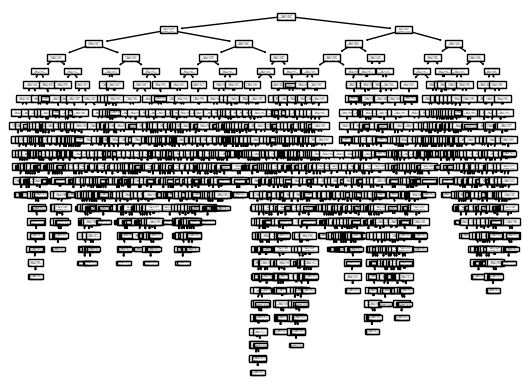

In [29]:
# Erster Test Entscheidungsbaum

from sklearn import tree


y = df.label
clf = tree.DecisionTreeClassifier().fit(X_w2v, y)

tree.plot_tree(clf,proportion='true')

In [30]:
# Erster Test NB
from sklearn.naive_bayes import GaussianNB

y = df.label
clf = GaussianNB()

clf.fit(X_w2v,y)

ypred_tfidf = clf.predict(X_w2v)

print("Accuracy: ", accuracy_score(y, ypred_tfidf))

Accuracy:  0.7593764693117292


## FastText

In [31]:
from gensim.models import FastText

In [32]:
ft = FastText(data, window = 5)

In [33]:
ft.train(data, total_examples=len(df['tweet_cleaned']), epochs=20)

(3789145, 4126720)

In [34]:
ft.wv.most_similar(positive="motivation")

[('mondaymotivation', 0.9535002112388611),
 ('motivational', 0.9509093165397644),
 ('tuesdaymotivation', 0.9483514428138733),
 ('inspiration', 0.8398556709289551),
 ('meditation', 0.825628399848938),
 ('transformation', 0.8147178292274475),
 ('affirmation', 0.813715934753418),
 ('innovation', 0.8127020001411438),
 ('motivated', 0.7937077879905701),
 ('motivate', 0.7936668395996094)]

In [35]:
ft.wv.most_similar(negative="motivation")

[('hi', 0.3747166097164154),
 ('yr', 0.3711909055709839),
 ('gator', 0.3598678708076477),
 ('xbox', 0.34656572341918945),
 ('six', 0.3435308039188385),
 ('v', 0.34028592705726624),
 ('pit', 0.32291725277900696),
 ('bro', 0.3224433362483978),
 ('snatch', 0.3214750587940216),
 ('driver', 0.3192792236804962)]

In [36]:
size = 100

def ft_vector(tokenized_tweet, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokenized_tweet:
        try:
            vec += ft.wv[word].reshape((1, size))
            count += 1
        except KeyError: 
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [37]:
X_ft = np.zeros((len(data),size))

In [38]:
X_ft

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
for i in range(len(data)):
    X_ft[i,:] = ft_vector(data.iloc[i],size)

In [40]:
X_ft

array([[-1.01819592, -0.51515002, -0.42919816, ..., -0.59936925,
        -0.62689319,  0.13537019],
       [-0.49664545, -0.38873759, -0.27901573, ...,  0.05751484,
         0.56075466,  0.14919331],
       [ 0.95586137,  0.356942  ,  0.08002298, ..., -1.18707555,
        -0.17275379, -0.11604807],
       ...,
       [-0.24477875, -1.08817935, -0.53416298, ..., -0.74170219,
         0.12164422,  0.05725923],
       [-0.20786113, -0.03536951, -0.27275918, ..., -0.09530865,
         0.40808553,  0.20102671],
       [-0.5514156 , -0.08796716, -0.67090353, ..., -0.37703233,
        -0.22014984, -0.00824241]])

In [41]:
ft_df = pd.DataFrame(X_ft)

In [42]:
ft_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.018196,-0.515150,-0.429198,0.090118,-0.268418,0.061621,0.082080,-0.136647,-0.575080,-0.243342,...,-0.383781,-0.706639,-0.625411,-0.699235,0.995959,-0.259281,-0.280309,-0.599369,-0.626893,0.135370
1,-0.496645,-0.388738,-0.279016,0.228851,0.174155,0.061257,-0.247226,-0.086754,0.415414,-0.201195,...,-0.104492,-0.431481,-0.290049,0.126416,-0.224883,0.424693,-0.006084,0.057515,0.560755,0.149193
2,0.955861,0.356942,0.080023,0.648738,-0.571584,0.236519,0.995609,-0.987218,-0.681173,-0.634894,...,0.905908,0.762785,-0.317519,0.334722,-0.609413,-0.610138,-0.535511,-1.187076,-0.172754,-0.116048
3,-0.733554,-0.368045,-0.555081,-0.002208,-0.066070,-0.343724,-0.149790,0.054722,-0.407975,-0.492283,...,-0.128562,-0.436156,-0.102131,-0.710064,-0.289072,-0.441155,-0.054708,-1.955788,0.508654,-0.525170
4,-1.144822,0.541680,-0.486851,0.838930,-0.420480,0.572597,-0.065905,-0.370770,0.341999,-0.728615,...,-0.601783,0.213987,-0.261292,0.328450,-1.207673,0.192497,-0.009832,0.047170,0.072884,0.310593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27644,0.216267,-0.096296,0.068710,0.132238,-0.065347,-0.901016,-1.125800,-0.748722,-0.422571,0.053040,...,0.579359,-0.416021,-0.788361,-0.981949,-0.196916,-1.101972,-0.143644,-2.135040,1.237338,-0.038740
27645,0.183573,-0.334866,-0.323073,-0.078976,0.882882,0.060874,0.363990,1.107904,0.000239,-0.314604,...,0.048341,0.193288,0.268676,-0.442166,0.691543,-0.083263,0.098423,-1.225000,0.455327,0.392277
27646,-0.244779,-1.088179,-0.534163,-0.914113,0.869003,0.002594,0.991123,-0.202386,-0.434326,-0.181571,...,-0.443003,-0.413590,0.451643,-1.705179,0.176604,-0.023287,-0.180380,-0.741702,0.121644,0.057259
27647,-0.207861,-0.035370,-0.272759,0.227450,-0.221800,0.256484,0.330302,0.280231,0.117086,-0.420349,...,-0.527264,-0.058843,0.049715,-0.177932,-0.050855,0.114639,0.259388,-0.095309,0.408086,0.201027


[Text(0.49056608104722615, 0.9838709677419355, 'X[70] <= -0.164\ngini = 0.122\nsamples = 100.0%\nvalue = [0.935, 0.065]'),
 Text(0.25866506623312135, 0.9516129032258065, 'X[48] <= -0.145\ngini = 0.291\nsamples = 20.5%\nvalue = [0.824, 0.176]'),
 Text(0.12071426855248193, 0.9193548387096774, 'X[23] <= -0.516\ngini = 0.409\nsamples = 10.2%\nvalue = [0.713, 0.287]'),
 Text(0.03225761240409412, 0.8870967741935484, 'X[72] <= -0.518\ngini = 0.5\nsamples = 3.1%\nvalue = [0.497, 0.503]'),
 Text(0.0025628293636174334, 0.8548387096774194, 'X[58] <= -0.963\ngini = 0.129\nsamples = 0.3%\nvalue = [0.931, 0.069]'),
 Text(0.0015376976181704601, 0.8225806451612904, 'gini = 0.0\nsamples = 0.0%\nvalue = [0.0, 1.0]'),
 Text(0.003587961109064407, 0.8225806451612904, 'X[33] <= 0.503\ngini = 0.082\nsamples = 0.3%\nvalue = [0.957, 0.043]'),
 Text(0.0025628293636174334, 0.7903225806451613, 'X[38] <= 0.418\ngini = 0.056\nsamples = 0.2%\nvalue = [0.971, 0.029]'),
 Text(0.0015376976181704601, 0.7580645161290323,

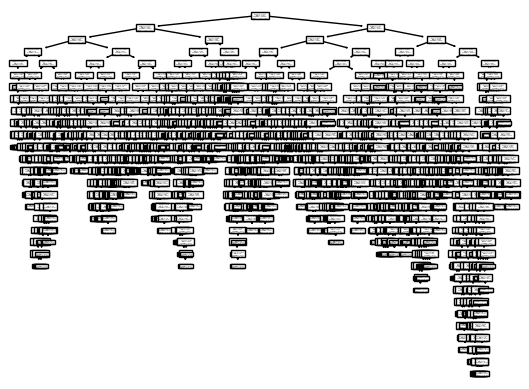

In [43]:
# Erster Test Entscheidungsbaum
from sklearn import tree

y = df.label
clf = tree.DecisionTreeClassifier().fit(X_ft, y)

tree.plot_tree(clf,proportion='true')

In [44]:
# Erster Test NB
from sklearn.naive_bayes import GaussianNB

y = df.label
clf = GaussianNB()

clf.fit(X_ft,y)

ypred_tfidf = clf.predict(X_ft)

print("Accuracy: ", accuracy_score(y, ypred_tfidf))

Accuracy:  0.7653079677384353


In [46]:
print(type(X_bow))

<class 'scipy.sparse._csr.csr_matrix'>


In [47]:
print(type(X_tfidf))

<class 'scipy.sparse._csr.csr_matrix'>


In [48]:
print(type(X_w2v))

<class 'numpy.ndarray'>


In [49]:
print(type(X_ft))

<class 'numpy.ndarray'>
